In [ ]:
%pip install pandas matplotlib

In [3]:
%pip list | grep pandas

pandas                  3.0.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import os

In [ ]:
%pip install duckdb jupysql duckdb-engine

In [2]:
%load_ext sql
%sql duckdb:///:memory:

Connecting to 'duckdb:///:memory:'

In [3]:
path_to_dataset = '../data/raw/FraudDetection.csv'

if not os.path.isfile(path_to_dataset):
    print('fail')
else:
    df = pd.read_csv(path_to_dataset)

In [4]:
import duckdb

In [5]:
con = duckdb.connect(database=':memory:')

%sql con

In [6]:
%%sql

SELECT *
FROM
    df
ORDER BY
    RANDOM()
LIMIT 5;

Running query in 'DuckDBPyConnection'

Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
TXN_527,USER_9905,179.47,Online,2023-03-10 09:44:00,48065.14,Tablet,New York,Clothing,0,0,3,272.96,0,Mastercard,10,4330.13,Password,0.0919,1,0
TXN_4695,USER_6402,28.12,Bank Transfer,2023-10-16 00:14:00,45913.68,Mobile,London,Clothing,0,0,5,499.08,0,Discover,3,239.29,OTP,0.3123,0,0
TXN_16400,USER_9772,256.81,Bank Transfer,2023-01-13 14:20:00,49641.89,Tablet,Mumbai,Groceries,0,0,1,199.13,3,Visa,176,3364.24,OTP,0.8821,0,1
TXN_21676,USER_6621,56.28,Online,2023-03-15 22:04:00,94845.74,Tablet,Tokyo,Restaurants,0,0,10,183.35,0,Mastercard,162,4770.79,Password,0.2784,0,0
TXN_46051,USER_9993,8.26,Bank Transfer,2023-04-07 05:08:00,49773.25,Mobile,Sydney,Clothing,0,0,3,78.9,0,Mastercard,214,2121.79,PIN,0.0278,0,0


In [7]:
df.shape

(50000, 21)

In [8]:
df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='str')

In [9]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  str    
 1   User_ID                       50000 non-null  str    
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  str    
 4   Timestamp                     50000 non-null  str    
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  str    
 7   Location                      50000 non-null  str    
 8   Merchant_Category             50000 non-null  str    
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  Failed_Trans

In [11]:
df.isna().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
%%sql

DESCRIBE df;

Running query in 'DuckDBPyConnection'

column_name,column_type,null,key,default,extra
Transaction_ID,VARCHAR,YES,None,None,None
User_ID,VARCHAR,YES,None,None,None
Transaction_Amount,DOUBLE,YES,None,None,None
Transaction_Type,VARCHAR,YES,None,None,None
Timestamp,VARCHAR,YES,None,None,None
Account_Balance,DOUBLE,YES,None,None,None
Device_Type,VARCHAR,YES,None,None,None
Location,VARCHAR,YES,None,None,None
Merchant_Category,VARCHAR,YES,None,None,None
IP_Address_Flag,BIGINT,YES,None,None,None


In [ ]:
%pip install seaborn

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Obs
 Fraud_Label
0    33933
1    16067
Name: count, dtype: int64

Procentaj:
 Fraud_Label
0    67.866
1    32.134
Name: proportion, dtype: float64


/var/folders/7j/_p9t5tjd6cv81x2zrk834f_40000gn/T/ipykernel_30990/2333769528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud_Label', data=df, palette='viridis')


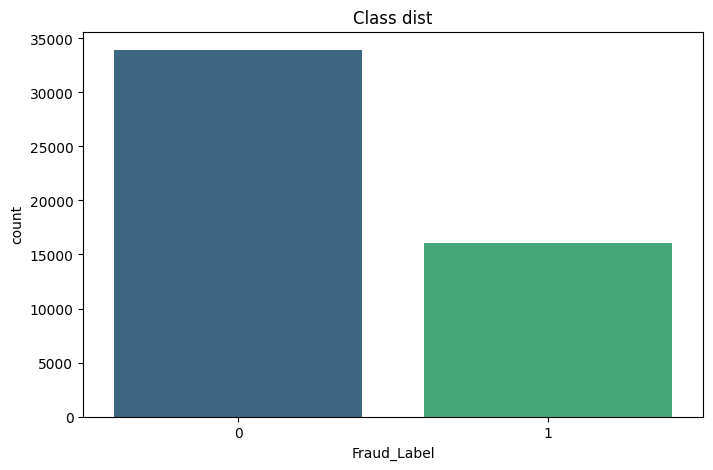

In [15]:
counts = df['Fraud_Label'].value_counts()
percentages = df['Fraud_Label'].value_counts(normalize=True) * 100

print("Obs\n", counts)
print("\nProcentaj:\n", percentages)

plt.figure(figsize=(8, 5))
sns.countplot(x='Fraud_Label', data=df, palette='viridis')
plt.title('Class dist')
plt.show()